# ARIMA and Seasonal ARIMA

# Importing all the necessary Libraries

In [301]:
pip install Numpy==1.22.0

Note: you may need to restart the kernel to use updated packages.


In [302]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [303]:
Data = pd.read_csv('perrin-freres-monthly-champagne-.csv')

In [304]:
Data.head()

,Month,Perrin Freres monthly champagne sales millions ?64-?72
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0


In [305]:
Data.tail()

,Month,Perrin Freres monthly champagne sales millions ?64-?72
102,1972-07,4298.0
103,1972-08,1413.0
104,1972-09,5877.0
105,NaN,NaN
106,Perrin Freres monthly champagne sales millions...,NaN


In [306]:
Data.columns

Index(['Month', 'Perrin Freres monthly champagne sales millions ?64-?72'], dtype='object')

In [307]:
Data = Data.rename(columns={'Perrin Freres monthly champagne sales millions ?64-?72':'Sales'})

In [308]:
Data.head()

,Month,Sales
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0


In [309]:
Data.drop(106,axis=0,inplace=True)

In [310]:
Data.tail()

,Month,Sales
101,1972-06,5312.0
102,1972-07,4298.0
103,1972-08,1413.0
104,1972-09,5877.0
105,NaN,NaN


In [311]:
Data.drop(105,axis=0,inplace=True)

In [312]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Month   105 non-null    object 
 1   Sales   105 non-null    float64
dtypes: float64(1), object(1)
memory usage: 1.8+ KB


In [313]:
# Coverting the date object into datetine 
Data['Month'] = pd.to_datetime(Data['Month'])

In [314]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Month   105 non-null    datetime64[ns]
 1   Sales   105 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 1.8 KB


In [315]:
Data.set_index('Month',inplace=True)

In [316]:
Data.head()

,Sales
Month,
1964-01-01,2815.0
1964-02-01,2672.0
1964-03-01,2755.0
1964-04-01,2721.0
1964-05-01,2946.0


# Visualizing the data

<AxesSubplot:xlabel='Month'>

<Figure size 1440x720 with 0 Axes>

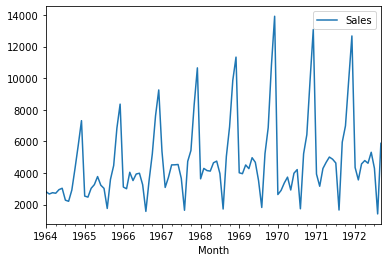

In [317]:
plt.figure(figsize=(20,10))
Data.plot()

# Testing the data is stationary or Not 

In [318]:
from statsmodels.tsa.stattools import adfuller

In [319]:
def adf_test(sales):
    result = adfuller(sales,autolag='AIC')
    print('1. ADF :',result[0])
    print('2. p-value :',result[1])
    print('2. Num of Lags :',result[2])
    print('2. Num of Observations:',result[3])
    if result[1] <=0.05:
        print('Reject the Null hypothesis')
    else:
        print('Accept the Null Hypothesis')

In [320]:
adf_test(Data['Sales'])

1. ADF : -1.8335930563276195
2. p-value : 0.3639157716602467
2. Num of Lags : 11
2. Num of Observations: 93
Accept the Null Hypothesis


# p value is not less than 0.05 so it is not sationary data
# Differencing

In [321]:
Data['Sales'].shift(1)

Month
1964-01-01       NaN
1964-02-01    2815.0
1964-03-01    2672.0
1964-04-01    2755.0
1964-05-01    2721.0
               ...  
1972-05-01    4788.0
1972-06-01    4618.0
1972-07-01    5312.0
1972-08-01    4298.0
1972-09-01    1413.0
Name: Sales, Length: 105, dtype: float64

In [322]:
Data['Sales Shift 1'] = Data['Sales'].shift(1)
Data['Sales fisrt Difference'] = Data['Sales']- Data['Sales'].shift(1)

In [323]:
Data.head()

,Sales,Sales Shift 1,Sales fisrt Difference
Month,,,
1964-01-01,2815.0,NaN,NaN
1964-02-01,2672.0,2815.0,-143.0
1964-03-01,2755.0,2672.0,83.0
1964-04-01,2721.0,2755.0,-34.0
1964-05-01,2946.0,2721.0,225.0


In [324]:
adf_test(Data['Sales fisrt Difference'].dropna())

1. ADF : -7.189896448051006
2. p-value : 2.51962044738698e-10
2. Num of Lags : 11
2. Num of Observations: 92
Reject the Null hypothesis


In [325]:
Data['Seasonal Shift 12'] = Data['Sales'].shift(12)
Data['Seasonal fisrt Difference'] = Data['Sales']- Data['Sales'].shift(12)

In [326]:
Data.head()

,Sales,Sales Shift 1,Sales fisrt Difference,Seasonal Shift 12,Seasonal fisrt Difference
Month,,,,,
1964-01-01,2815.0,NaN,NaN,NaN,NaN
1964-02-01,2672.0,2815.0,-143.0,NaN,NaN
1964-03-01,2755.0,2672.0,83.0,NaN,NaN
1964-04-01,2721.0,2755.0,-34.0,NaN,NaN
1964-05-01,2946.0,2721.0,225.0,NaN,NaN


In [327]:
adf_test(Data['Seasonal fisrt Difference'].dropna())

1. ADF : -7.626619157213166
2. p-value : 2.0605796968136632e-11
2. Num of Lags : 0
2. Num of Observations: 92
Reject the Null hypothesis


<AxesSubplot:xlabel='Month'>

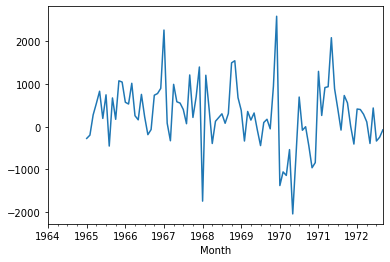

In [328]:
Data['Seasonal fisrt Difference'].plot()

# ACF and PACF plots

In [329]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

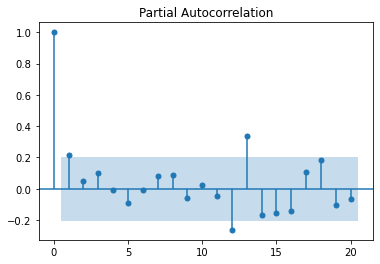

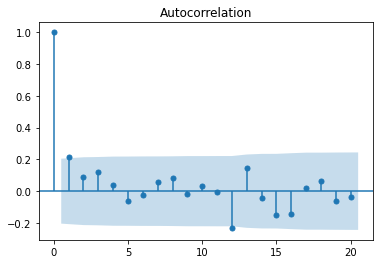

In [330]:
pacf = plot_pacf(Data['Seasonal fisrt Difference'].iloc[13:],lags=20)
acf = plot_acf(Data['Seasonal fisrt Difference'].iloc[13:],lags=20)

# SARIMA

In [333]:
import statsmodels.api as sm 
import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)

In [334]:
model = sm.tsa.statespace.SARIMAX(Data['Sales'],order=(1,1,1),seasonal_order=(1,1,1,12))
model_fit = model.fit()

c:\Users\navee\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
c:\Users\navee\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [338]:
Data['Forecast'] = model_fit.predict(start=95,end=102,dynamic=True)

<AxesSubplot:xlabel='Month'>

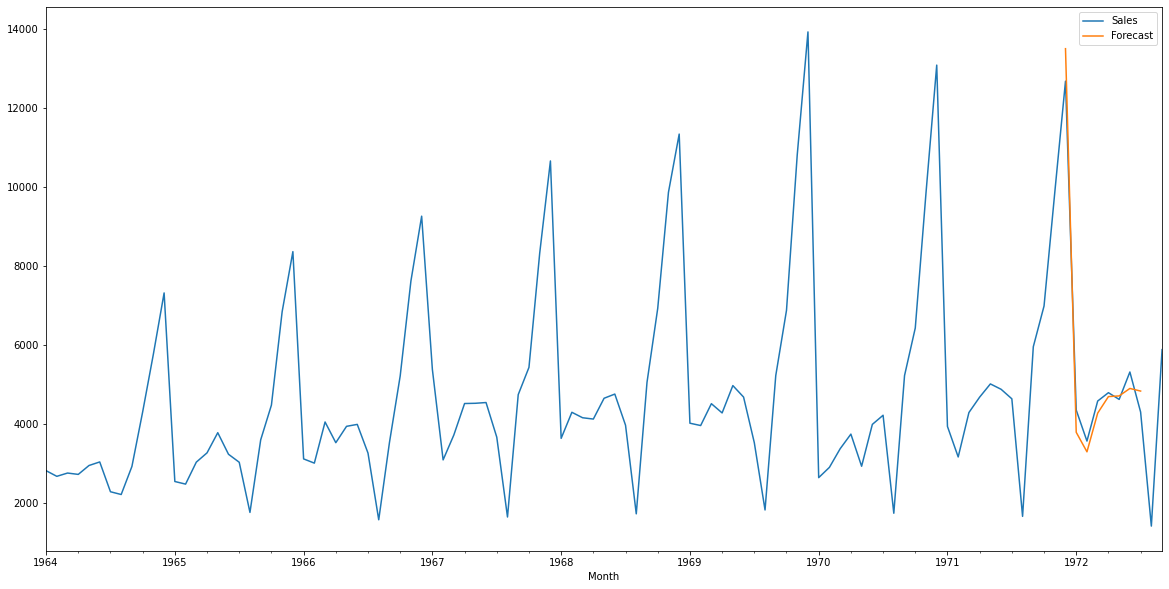

In [339]:
Data[['Sales','Forecast']].plot(figsize=(20,10))